In [1]:
#import packages
from __future__ import division 
import sys
import pandas as pd
import numpy as np
import scipy
from numpy import mean, std, cov 
from numpy.random import seed, randn
import matplotlib.pyplot as plt
from matplotlib import pyplot
from math import sqrt
import scipy.stats as stats 
from scipy.stats import t, pearsonr, sem
import seaborn as sns
from statistics import mean, stdev

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#sns.set_theme(color_codes=True)
sns.set_theme(style='white')

In [159]:
# import sys
# print(sys.executable)
# !{sys.executable} -m pip install bambi

In [4]:
import arviz as az
import bambi as bmb
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.lines import Line2D
from matplotlib.patches import Patch

ModuleNotFoundError: No module named 'arviz'

In [161]:
#import excel file containing data summary

data = pd.read_csv(r'WTP_LONG_ALL.csv', encoding='utf-8-sig')
pd.set_option("display.max_rows", None, "display.max_columns", None)


data = data.loc[(data['balanced'] == 1)]
data= data.reset_index(drop=True)
print(data.head())
print(data.columns)

                      subid  balanced  subtrial  social_money  \
0  56259489ed6e5a0005c80fde         1         1          0.05   
1  56259489ed6e5a0005c80fde         1         2          0.03   
2  56259489ed6e5a0005c80fde         1         3          0.01   
3  56259489ed6e5a0005c80fde         1         4          0.01   
4  56259489ed6e5a0005c80fde         1         5          0.03   

   nonsocial_money  social_money2  nonsocial_money2  exp_chosen  \
0             0.02              5                 2         0.0   
1             0.04              3                 4         0.0   
2             0.03              1                 3         0.0   
3             0.05              1                 5         1.0   
4             0.02              3                 2         0.0   

   decision_price  reaction_time  response  AQ     MSPSS  IRI_FS  IRI_EC  \
0            0.02         2.0925       2.0  37  6.666667      26      20   
1            0.04         1.8986       1.0  37  6.6666

In [162]:
# #import excel file  containing data summary
# study2 = wtpdata.loc[(wtpdata['balanced'] == 1)]
# study2= study2.reset_index(drop=True)
# print(study2)


In [163]:
# sum_wtp =study2.total_spent_social
# aq = study2.AQ

In [164]:
# model_hierarchical = bmb.Model("p(sum_wtp,AQ ) ~ 1 + (1|dem_ID)", df, family="binomial")
# model_hierarchical

In [165]:
 ## getting column names
demographics = "dem_AGE + dem_GENDER +dem_SEX +dem_ETHNICITY"
prices = "social_money2 + nonsocial_money2"
sociability = "MSPSS + UM_AFFILIATION_mean + UM_INTIMACY_mean"
mentalizing = "AQ + IRI_PT + IRI_EC"
solitude = "MSSSF + UCLA_loneliness"
dep_anx = "RSE + CESD + LSAS + STAI"
coping = 'BRCS'
reward = 'BISBAS_BIS + BISBAS_BASRR + BISBAS_FS + BISBAS_BASD'
covid = 'COVIDexperience_score + COVIDimpacts_score + COVIDthreat_score + COVIDpsychstress_score'
y = data["exp_chosen"]

x_columns = demographics

In [166]:
## creating function to get model statistics
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
# def get_stats():
#     x = data[x_columns]
#     results = smf.Logit(y, x).fit()
#     print(results.summary())
# get_stats()
# x_columns.extend(sociability)
# get_stats()



In [167]:
#add demographics to model
model = smf.glm('exp_chosen ~ dem_AGE + dem_GENDER+ dem_SEX+ dem_ETHNICITY', family= sm.families.Binomial(),data=data).fit()
model.summary() 


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             exp_chosen   No. Observations:                11299
Model:                            GLM   Df Residuals:                    11294
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7787.7
Date:                Thu, 26 May 2022   Deviance:                       15575.
Time:                        12:35:41   Pearson chi2:                 1.13e+04
No. Iterations:                     4   Pseudo R-squ. (CS):           0.007201
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.7498      0.162      4.641      0.000       0.433       1.066
dem_AGE          -0.0349      0.004     -8.425      0.000      -0.043      -0.027
dem_GENDER       -0.2387      0.078     -3.080      0.002      -0.391      -0.087
dem_SEX           0.2428      0.088      2.758      0.006       0.070       0.415
dem_ETHNICITY     0.0954      0.055      1.750      0.080      -0.011       0.202
=================================================================================
"""

In [169]:
#add prices to model
model = smf.glm('exp_chosen ~ dem_AGE + dem_GENDER+ dem_SEX+ dem_ETHNICITY + social_money2 + nonsocial_money2', family= sm.families.Binomial(),data=data).fit()
model.summary() 


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             exp_chosen   No. Observations:                11299
Model:                            GLM   Df Residuals:                    11292
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7734.1
Date:                Thu, 26 May 2022   Deviance:                       15468.
Time:                        12:35:50   Pearson chi2:                 1.13e+04
No. Iterations:                     4   Pseudo R-squ. (CS):            0.01658
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.7046      0.172      4.099      0.000       0.368       1.041
dem_AGE             -0.0353      0.004     -8.475      0.000      -0.043      -0.027
dem_GENDER          -0.2411      0.078     -3.096      0.002      -0.394      -0.088
dem_SEX              0.2449      0.088      2.769      0.006       0.072       0.418
dem_ETHNICITY        0.0966      0.055      1.763      0.078      -0.011       0.204
social_money2       -0.0890      0.013     -6.620      0.000      -0.115      -0.063
nonsocial_money2     0.1069      0.013      7.946      0.000       0.081       0.133
====================================================================================
"""

In [170]:
# model = smf.logit("exp_chosen ~ dem_AGE + dem_GENDER+ dem_SEX+ dem_ETHNICITY", data = data).fit()

# model.summary()

In [171]:
# model.params

In [172]:
#add mental health
model = smf.glm('exp_chosen ~ dem_AGE + dem_GENDER+ dem_SEX+ dem_ETHNICITY + social_money2 + nonsocial_money2 + %s' %(dep_anx), family= sm.families.Binomial(),data=data).fit()
model.summary() 


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             exp_chosen   No. Observations:                11299
Model:                            GLM   Df Residuals:                    11288
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7656.3
Date:                Thu, 26 May 2022   Deviance:                       15313.
Time:                        12:35:55   Pearson chi2:                 1.13e+04
No. Iterations:                     4   Pseudo R-squ. (CS):            0.03003
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.2382      0.255      4.864      0.000       0.739       1.737
dem_AGE             -0.0452      0.004    -10.430      0.000      -0.054      -0.037
dem_GENDER          -0.2111      0.081     -2.617      0.009      -0.369      -0.053
dem_SEX              0.2623      0.091      2.867      0.004       0.083       0.442
dem_ETHNICITY       -0.0106      0.057     -0.187      0.851      -0.121       0.100
social_money2       -0.0903      0.014     -6.673      0.000      -0.117      -0.064
nonsocial_money2     0.1083      0.014      7.996      0.000       0.082       0.135
RSE                  0.0088      0.005      1.852      0.064      -0.001       0.018
CESD                -0.0119      0.003     -4.046      0.000      -0.018      -0.006
LSAS                -0.0021      0.001     -2.849      0.004      -0.003      -0.001
STAI                -0.0020      0.002     -0.837      0.403      -0.007       0.003
====================================================================================
"""

In [173]:
#add solitude measures
model = smf.glm('exp_chosen ~ dem_AGE + dem_GENDER+ dem_SEX+ dem_ETHNICITY + social_money2 + nonsocial_money2 + %s + %s' %(dep_anx,solitude), family= sm.families.Binomial(),data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             exp_chosen   No. Observations:                11299
Model:                            GLM   Df Residuals:                    11286
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7606.4
Date:                Thu, 26 May 2022   Deviance:                       15213.
Time:                        12:35:56   Pearson chi2:                 1.13e+04
No. Iterations:                     4   Pseudo R-squ. (CS):            0.03856
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            2.4683      0.290      8.523      0.000       1.901       3.036
dem_AGE             -0.0436      0.004     -9.992      0.000      -0.052      -0.035
dem_GENDER          -0.1830      0.081     -2.254      0.024      -0.342      -0.024
dem_SEX              0.2069      0.093      2.232      0.026       0.025       0.389
dem_ETHNICITY        0.0454      0.058      0.781      0.435      -0.068       0.159
social_money2       -0.0909      0.014     -6.689      0.000      -0.118      -0.064
nonsocial_money2     0.1094      0.014      8.039      0.000       0.083       0.136
RSE                  0.0018      0.005      0.363      0.717      -0.008       0.011
CESD                -0.0005      0.003     -0.166      0.868      -0.007       0.006
LSAS                -0.0015      0.001     -1.994      0.046      -0.003   -2.55e-05
STAI                -0.0025      0.002     -1.019      0.308      -0.007       0.002
MSSSF               -0.0167      0.003     -5.918      0.000      -0.022      -0.011
UCLA_loneliness     -0.0157      0.002     -6.376      0.000      -0.021      -0.011
====================================================================================
"""

In [174]:
#add mentalizing measures
model = smf.glm('exp_chosen ~ dem_AGE + dem_GENDER+ dem_SEX+ dem_ETHNICITY + social_money2 + nonsocial_money2 + %s + %s + %s' %(dep_anx,solitude, mentalizing), family= sm.families.Binomial(),data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             exp_chosen   No. Observations:                11299
Model:                            GLM   Df Residuals:                    11283
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7570.9
Date:                Thu, 26 May 2022   Deviance:                       15142.
Time:                        12:35:59   Pearson chi2:                 1.13e+04
No. Iterations:                     4   Pseudo R-squ. (CS):            0.04458
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            2.5482      0.311      8.192      0.000       1.939       3.158
dem_AGE             -0.0434      0.004     -9.879      0.000      -0.052      -0.035
dem_GENDER          -0.2305      0.082     -2.814      0.005      -0.391      -0.070
dem_SEX              0.2224      0.094      2.367      0.018       0.038       0.406
dem_ETHNICITY        0.0544      0.059      0.929      0.353      -0.060       0.169
social_money2       -0.0914      0.014     -6.706      0.000      -0.118      -0.065
nonsocial_money2     0.1099      0.014      8.054      0.000       0.083       0.137
RSE                  0.0008      0.005      0.162      0.872      -0.009       0.011
CESD                 0.0004      0.003      0.140      0.889      -0.006       0.007
LSAS                -0.0007      0.001     -0.889      0.374      -0.002       0.001
STAI                -0.0021      0.002     -0.842      0.400      -0.007       0.003
MSSSF               -0.0158      0.003     -5.439      0.000      -0.021      -0.010
UCLA_loneliness     -0.0095      0.003     -3.626      0.000      -0.015      -0.004
AQ                  -0.0266      0.004     -7.538      0.000      -0.034      -0.020
IRI_PT              -0.0062      0.005     -1.264      0.206      -0.016       0.003
IRI_EC               0.0134      0.005      2.673      0.008       0.004       0.023
====================================================================================
"""

In [175]:
#add social measures
model = smf.glm('exp_chosen ~ dem_AGE + dem_GENDER+ dem_SEX+ dem_ETHNICITY + social_money2 + nonsocial_money2 + %s + %s + %s +%s' %(dep_anx,solitude, mentalizing, sociability), family= sm.families.Binomial(),data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             exp_chosen   No. Observations:                11299
Model:                            GLM   Df Residuals:                    11280
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7508.2
Date:                Thu, 26 May 2022   Deviance:                       15016.
Time:                        12:36:02   Pearson chi2:                 1.13e+04
No. Iterations:                     4   Pseudo R-squ. (CS):            0.05513
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.3867      0.390      0.991      0.322      -0.378       1.152
dem_AGE                -0.0352      0.004     -7.834      0.000      -0.044      -0.026
dem_GENDER             -0.2006      0.082     -2.444      0.015      -0.362      -0.040
dem_SEX                 0.2008      0.095      2.106      0.035       0.014       0.388
dem_ETHNICITY          -0.0318      0.060     -0.534      0.593      -0.149       0.085
social_money2          -0.0925      0.014     -6.746      0.000      -0.119      -0.066
nonsocial_money2        0.1112      0.014      8.100      0.000       0.084       0.138
RSE                    -0.0010      0.005     -0.208      0.835      -0.011       0.009
CESD                   -0.0049      0.003     -1.484      0.138      -0.011       0.002
LSAS                   -0.0014      0.001     -1.757      0.079      -0.003       0.000
STAI                    0.0005      0.003      0.199      0.842      -0.004       0.005
MSSSF                  -0.0166      0.003     -5.577      0.000      -0.022      -0.011
UCLA_loneliness         0.0037      0.003      1.077      0.281      -0.003       0.010
AQ                     -0.0182      0.004     -4.937      0.000      -0.025      -0.011
IRI_PT                 -0.0068      0.005     -1.374      0.169      -0.016       0.003
IRI_EC                 -0.0037      0.005     -0.691      0.490      -0.014       0.007
MSPSS                   0.0361      0.024      1.513      0.130      -0.011       0.083
UM_AFFILIATION_mean     0.2563      0.035      7.368      0.000       0.188       0.324
UM_INTIMACY_mean        0.2074      0.040      5.160      0.000       0.129       0.286
=======================================================================================
"""

In [177]:
model_odds = pd.DataFrame(np.exp(model.params), columns= ['OR'])
# model_odds['p-value']= model.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(model.conf_int())

model_odds

,OR,2.5%,97.5%
Intercept,1.472079,0.685079,3.163161
dem_AGE,0.965430,0.956969,0.973965
dem_GENDER,0.818212,0.696586,0.961073
dem_SEX,1.222404,1.014034,1.473592
dem_ETHNICITY,0.968673,0.861933,1.088632
social_money2,0.911648,0.887472,0.936482
nonsocial_money2,1.117602,1.087935,1.148079
RSE,0.998953,0.989157,1.008845
CESD,0.995132,0.988740,1.001566
LSAS,0.998649,0.997144,1.000156


In [155]:
# #add coping
# model = smf.glm('exp_chosen ~ dem_AGE + dem_GENDER+ dem_SEX+ dem_ETHNICITY + %s + %s + %s +%s +%s' %(dep_anx,solitude, mentalizing,sociability), family= sm.families.Binomial(),data=data).fit()
# model.summary()

In [132]:
# # add reward sensitivity
# model = smf.glm('exp_chosen ~ dem_AGE + dem_GENDER+ dem_SEX+ dem_ETHNICITY + %s + %s + %s +%s +%s +%s' %(sociability, mentalizing, solitude, dep_anx,coping,reward), family= sm.families.Binomial(),data=data).fit()
# model.summary()

In [102]:
# #add covid measures
# model = smf.glm('exp_chosen ~ dem_AGE + dem_GENDER+ dem_SEX+ dem_ETHNICITY + %s + %s + %s +%s +%s +%s +%s' %(sociability, mentalizing, solitude, dep_anx,coping, reward, covid), family= sm.families.Binomial(),data=data).fit()
# model.summary()

In [103]:
# ax = sns.regplot(x="UM_AFFILIATION", y="prop_social", data=data)

In [104]:
# ax = sns.regplot(x="UM_INTIMACY", y="prop_social", data=data)

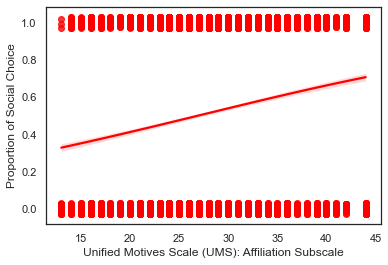

In [105]:
aff_exp = sns.regplot(x="UM_AFFILIATION", y="exp_chosen", data=data,logistic = True,y_jitter=0.03,color="red")
aff_exp.set(xlabel='Unified Motives Scale (UMS): Affiliation Subscale', ylabel='Proportion of Social Choice')
aff_exp.figure.savefig('APS_Study2_UM_AF_reg.svg')

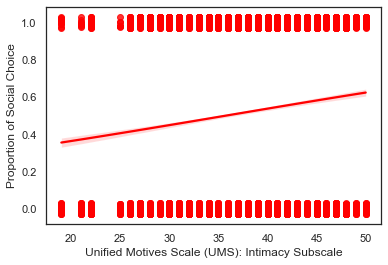

In [106]:
int_exp = sns.regplot(x="UM_INTIMACY", y="exp_chosen", data=data, logistic = True,y_jitter=0.03,color="red")
int_exp.set(xlabel='Unified Motives Scale (UMS): Intimacy Subscale', ylabel='Proportion of Social Choice')
aff_exp.figure.savefig('APS_Study2_UM_IN_reg.svg')

In [107]:
# sns.lmplot(x="UM_AFFILIATION", y="exp_chosen", data=data,
#            logistic=True, y_jitter=.03, height=5, aspect=1.2, palette = "red")
# plt.show()

In [108]:
# sns.lmplot(x="UM_INTIMACY", y="exp_chosen", data=data,
#            logistic=True, y_jitter=.03, height=5, aspect=1.2)
# plt.show()

In [109]:
# sns.lmplot(x="social_money", y="exp_chosen", data=data,
#            logistic=True, y_jitter=.03, height=5, aspect=1.2)
# plt.show()

In [110]:
# sns.lmplot(x="nonsocial_money", y="exp_chosen", data=data,
#            logistic=True, y_jitter=.03, height=5, aspect=1.2)
# plt.show()

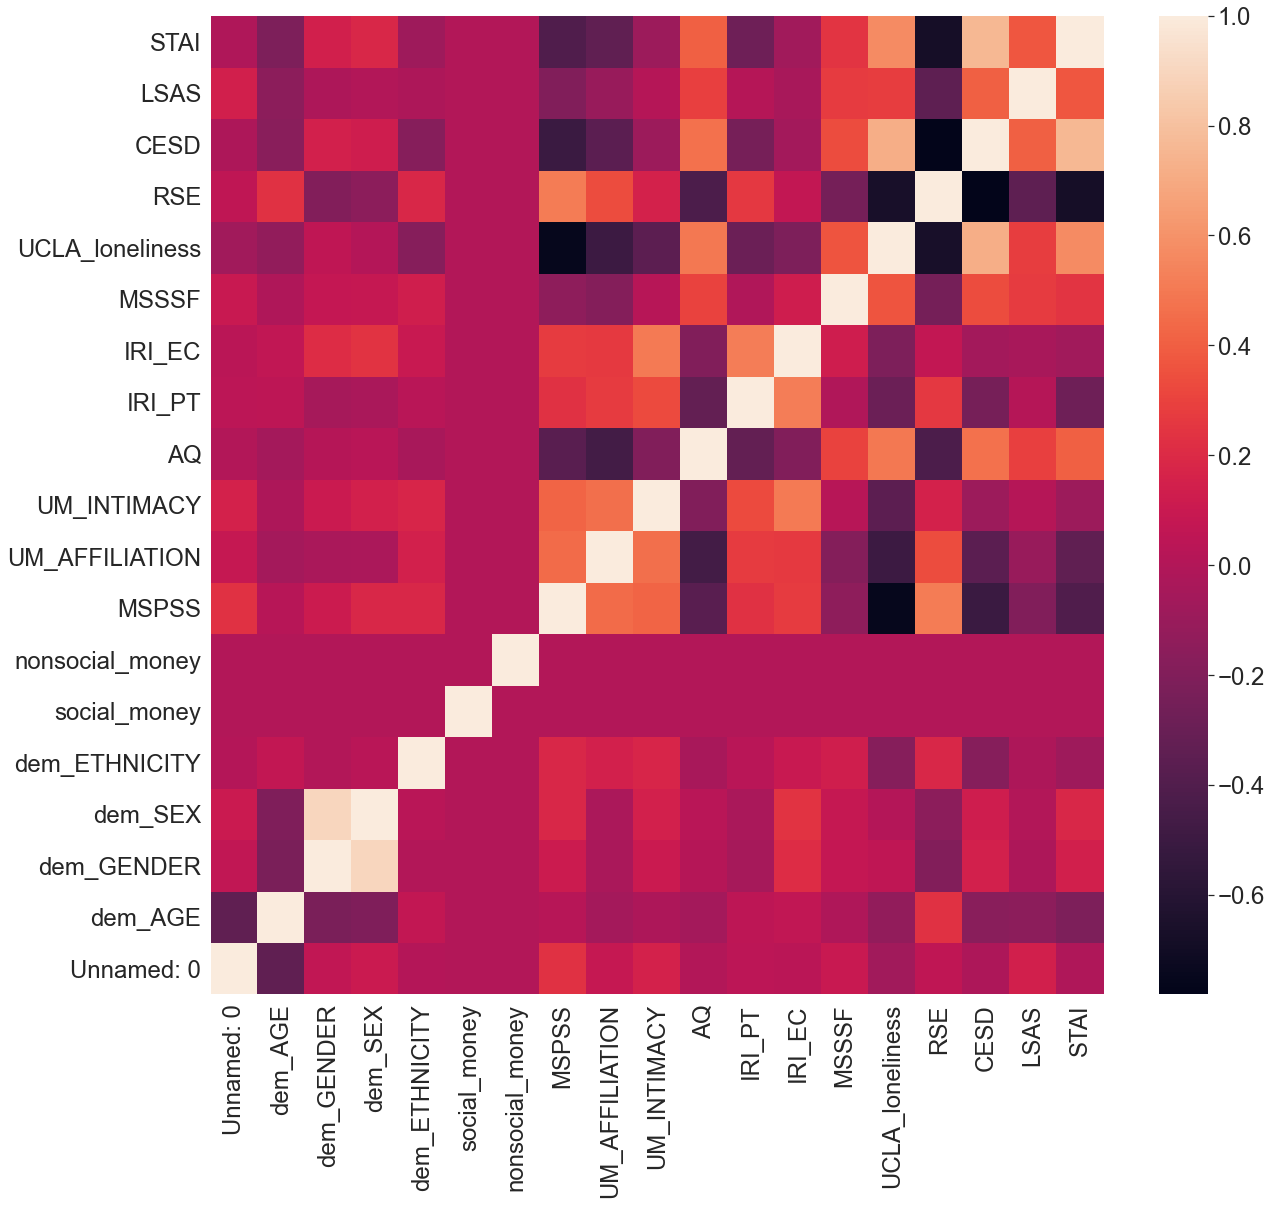

In [12]:
groups = ['dem_AGE','dem_GENDER','dem_SEX','dem_ETHNICITY', 'social_money2', 'nonsocial_money2','RSE','CESD','LSAS','STAI', 'MSSSF','UCLA_loneliness','AQ', 'IRI_PT','IRI_EC','MSPSS','UM_AFFILIATION_mean','UM_INTIMACY_mean']
# data2 = data[groups]
data2= pd.read_csv('WTP_Study2_LONG_REG_4heatmap.csv')
corr = data2.corr()
corr.style.background_gradient(cmap='coolwarm')
plt.figure(figsize=(20,18))
map= sns.heatmap(corr)
map.invert_yaxis()
map.tick_params(labelsize=24)
cbar = map.collections[0].colorbar
cbar.ax.tick_params(labelsize=24)
map.figure.savefig('APS_Study2_reg_heatmap.svg')

#pyplot.scatter(data2['LSAS'], data2['AQ'])



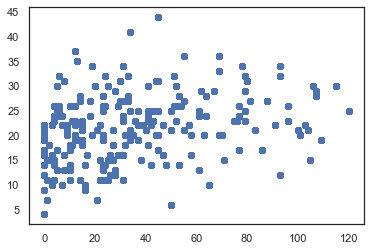

[[860.582932    57.83419631]
 [ 57.83419631  46.67873341]]
Pearsons correlation: 0.289
p value: 0.0000


In [14]:
pyplot.scatter(data2['LSAS'], data2['AQ'])
pyplot.show()
covariance = cov(data2['LSAS'], data2['AQ'])
print(covariance)
corr, _ = pearsonr(data2['LSAS'], data2['AQ'])
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(data2['LSAS'], data2['AQ'])
print('p value: %.4f' % p)